Load Fitur yang sudah di Cleaning

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
from joblib import dump,load

data = pd.read_csv('Fitur.csv')
X = data

reg_model = load('regression_Exam.pkl')

data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,0,2,0,7,73,0,1,0,0,1,1,2,3,0,0,2,1
1,19,64,0,1,0,8,59,0,1,2,1,1,1,0,4,0,1,1,0
2,24,98,1,1,1,7,91,1,1,2,1,1,1,1,4,0,2,2,1
3,29,89,0,1,1,8,98,1,1,1,1,1,1,0,4,0,0,1,1
4,19,92,1,1,1,6,65,1,1,3,1,2,1,1,4,0,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6243,25,69,2,1,0,7,76,1,1,1,2,1,1,2,2,0,0,2,0
6244,23,76,2,1,0,8,81,1,1,3,0,2,1,2,2,0,0,2,0
6245,20,90,1,0,1,6,65,0,1,3,0,1,1,0,2,0,2,2,0
6246,10,86,2,2,1,6,91,2,1,2,0,1,0,2,3,0,0,0,0


In [103]:
y_pred_exam = reg_model.predict(X)

In [104]:
y_label = [1 if score > 65 else 0 for score in y_pred_exam]

Load Model Regresi yang telah dibangun

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_label, test_size=0.2, random_state=42)

Terapkan SMOTE untuk Mengatasi Imbalance Data

In [106]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_c, y_train_c)

In [107]:
models = {
    "LogisticRegression": LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "SVC": svm.SVC(class_weight='balanced', probability=True, random_state=42),
    "RandomForestClassifier": RandomForestClassifier(),
    "XGBClassifier": XGBClassifier()
}

In [108]:
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix

for model_name, model in models.items():
    model.fit(X_train_resampled,y_train_resampled)

for model_name, model in models.items():
    print(f"Model: {model_name}")
    predictions = model.predict(X_test_c)
    print(f"Akurasi: \n", accuracy_score(y_test_c, predictions))
    print(f"Report: \n", classification_report(y_test_c, predictions))
    print(f"Confusion Matrix: \n", confusion_matrix(y_test_c, predictions))
    print("=" * 50)

Model: LogisticRegression
Akurasi: 
 0.9544
Report: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       320
           1       0.97      0.97      0.97       930

    accuracy                           0.95      1250
   macro avg       0.94      0.94      0.94      1250
weighted avg       0.95      0.95      0.95      1250

Confusion Matrix: 
 [[294  26]
 [ 31 899]]
Model: DecisionTree
Akurasi: 
 0.8912
Report: 
               precision    recall  f1-score   support

           0       0.77      0.82      0.79       320
           1       0.94      0.92      0.93       930

    accuracy                           0.89      1250
   macro avg       0.85      0.87      0.86      1250
weighted avg       0.89      0.89      0.89      1250

Confusion Matrix: 
 [[263  57]
 [ 79 851]]
Model: SVC
Akurasi: 
 0.9256
Report: 
               precision    recall  f1-score   support

           0       0.80      0.94      0.87       320
          

Best Model Selection

In [109]:
for model_name, model in models.items():
    model.fit(X_train_resampled,y_train_resampled)

for model_name, model in models.items():
    print(f"Model: {model_name}")
    y_train_pred_resampled = model.predict(X_train_resampled)
    train_acc = accuracy_score(y_train_resampled, y_train_pred_resampled)
    # Prediksi testing
    y_test_pred = model.predict(X_test_c)
    test_acc = accuracy_score(y_test_c, y_test_pred)
    print(f"Akurasi Training: {train_acc:.4f}")
    print(f"Akurasi Testing: {test_acc:.4f}\n")

Model: LogisticRegression
Akurasi Training: 0.9852
Akurasi Testing: 0.9544

Model: DecisionTree
Akurasi Training: 1.0000
Akurasi Testing: 0.8912

Model: SVC
Akurasi Training: 0.9341
Akurasi Testing: 0.9256

Model: RandomForestClassifier
Akurasi Training: 1.0000
Akurasi Testing: 0.9304

Model: XGBClassifier
Akurasi Training: 1.0000
Akurasi Testing: 0.9536



In [111]:
# Evaluasi akurasi setiap model
results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)

    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test_c)

    acc_train = accuracy_score(y_train_resampled, y_train_pred)
    acc_test = accuracy_score(y_test_c, y_test_pred)

    results.append({
        "Model": name,
        "Accuracy Train": acc_train,
        "Accuracy Test": acc_test,
        "Δ Accuracy": acc_train - acc_test
    })

# Tampilkan hasil evaluasi
df_results = pd.DataFrame(results)
print(df_results)

                    Model  Accuracy Train  Accuracy Test  Δ Accuracy
0      LogisticRegression        0.985179         0.9544    0.030779
1            DecisionTree        1.000000         0.8912    0.108800
2                     SVC        0.934115         0.9256    0.008515
3  RandomForestClassifier        1.000000         0.9296    0.070400
4           XGBClassifier        1.000000         0.9536    0.046400


<Figure size 1000x600 with 0 Axes>

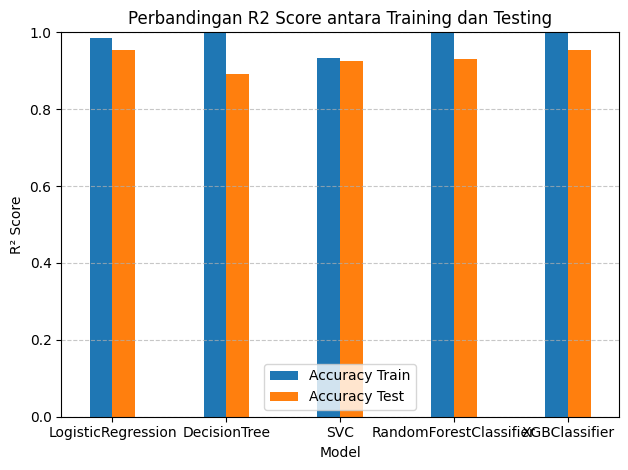

In [112]:
plt.figure(figsize=(10, 6))
df_results.set_index("Model")[["Accuracy Train", "Accuracy Test"]].plot.bar(rot=0, width=0.4)
plt.title("Perbandingan R2 Score antara Training dan Testing")
plt.ylabel("R² Score")
plt.ylim(0, 1)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [116]:
best_model = models['XGBClassifier']
# Prediksi training
y_train_pred_c = best_model.predict(X_train_resampled)
train_acc = accuracy_score(y_train_resampled, y_train_pred_c)

# Prediksi testing
y_test_pred = best_model.predict(X_test_c)
test_acc = accuracy_score(y_test_c, y_test_pred)

print(f"Akurasi Training: {train_acc:.4f}")
print(f"Akurasi Testing: {test_acc:.4f}")

Akurasi Training: 1.0000
Akurasi Testing: 0.9536


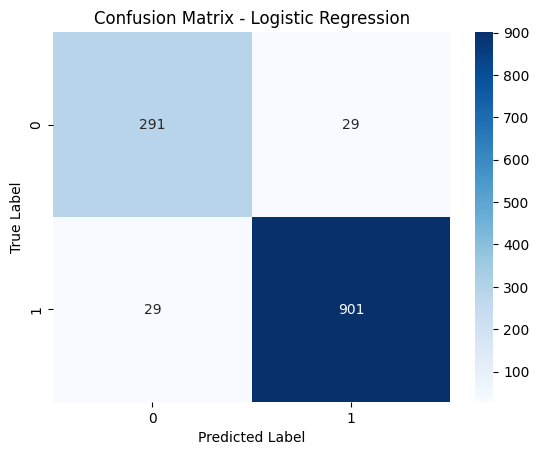

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Redo the prediction to ensure consistency
y_test_pred = best_model.predict(X_test_c)

# Confusion Matrix
cm = confusion_matrix(y_test_c, y_test_pred)

# Visualisasi dengan seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [118]:
# prediksi data baru
sample_data = pd.DataFrame({
    'Hours_Studied': [0],
    'Attendance': [30],
    'Parental_Involvement': [0],
    'Access_to_Resources': [2],
    'Extracurricular_Activities': [1],
    'Sleep_Hours': [6],
    'Previous_Scores': [20],
    'Motivation_Level': [0],
    'Internet_Access': [0],
    'Tutoring_Sessions': [0],
    'Family_Income': [0],
    'Teacher_Quality': [0],
    'School_Type': [1],
    'Peer_Influence': [0],
    'Physical_Activity': [0],
    'Learning_Disabilities': [0],
    'Parental_Education_Level': [1],
    'Distance_from_Home': [2],
    'Gender': [1]
})

# Prediksi skor ujian
prediction = best_model.predict(sample_data)
result = "Lulus" if prediction[0] == 1 else "Tidak Lulus"
print(f"\nPrediction Result: {result}")


Prediction Result: Tidak Lulus


In [119]:
import pandas as pd
pd.Series(y_label).value_counts()

,count
1,4641
0,1607


In [120]:
from joblib import dump

dump(model,'Clasification_Graduation.pkl')

['Clasification_Graduation.pkl']

In [ ]:
!pip freeze > requirements.txt